# 합성곱 신경망을 사용한 이미지 분류

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/8-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 패션 MNIST 데이터 불러오기

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


## 합성곱 신경망 만들기

In [3]:
model = keras.Sequential()

In [4]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))

In [5]:
model.add(keras.layers.MaxPooling2D(2))

In [6]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [7]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

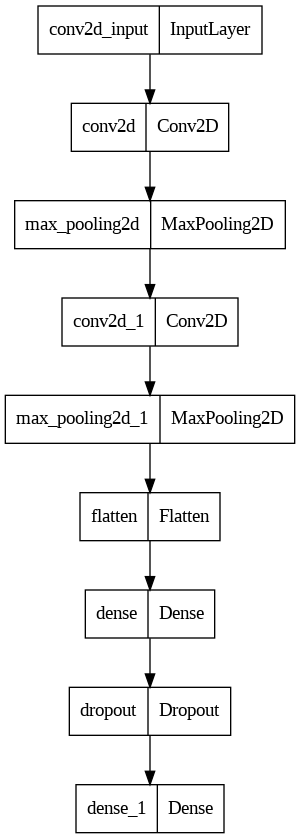

In [9]:
keras.utils.plot_model(model)

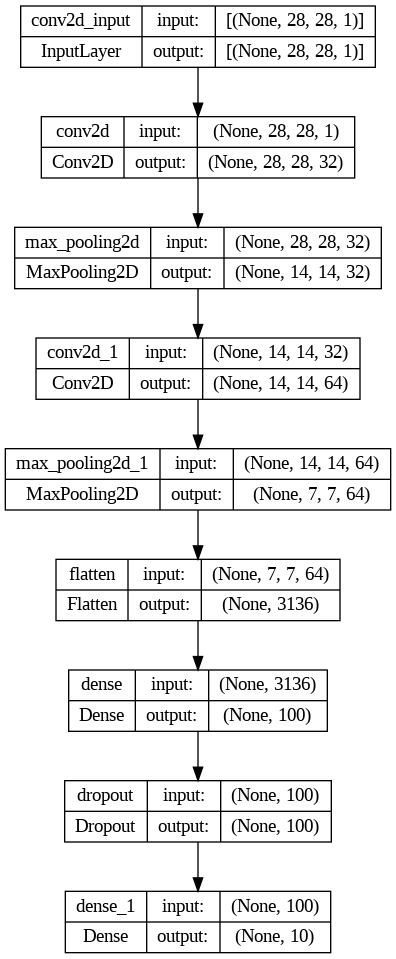

In [10]:
keras.utils.plot_model(model, show_shapes=True)

## 모델 컴파일과 훈련

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 25s 5ms/step - loss: 0.5091 - accuracy: 0.8178 - val_loss: 0.3178 - val_accuracy: 0.8823
Epoch 2/20
  26/1500 [..............................] - ETA: 6s - loss: 0.3565 - accuracy: 0.8702

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 8s 6ms/step - loss: 0.3382 - accuracy: 0.8775 - val_loss: 0.2747 - val_accuracy: 0.8964
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2927 - accuracy: 0.8945 - val_loss: 0.2451 - val_accuracy: 0.9101
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2583 - accuracy: 0.9064 - val_loss: 0.2343 - val_accuracy: 0.9131
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2358 - accuracy: 0.9134 - val_loss: 0.2234 - val_accuracy: 0.9160
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2151 - accuracy: 0.9211 - val_loss: 0.2149 - val_accuracy: 0.9220
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1982 - accuracy: 0.9268 - val_loss: 0.2145 - val_accuracy: 0.9202
Epoch 8/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1810 - accuracy: 0.9336 - val_loss: 0.2196 - val_accuracy: 0.9222
Epo

In [12]:
import matplotlib.pyplot as plt

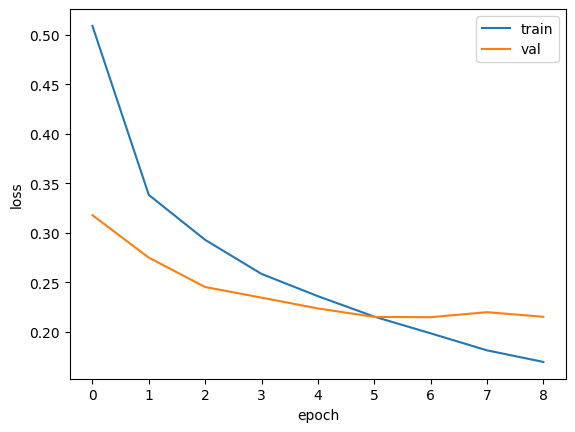

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [14]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2145 - accuracy: 0.9202


[0.21453545987606049, 0.9201666712760925]

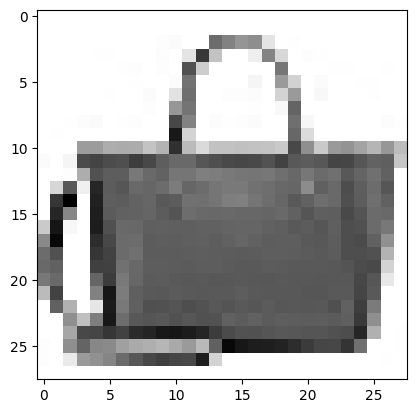

In [15]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [16]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 115ms/step
[[3.3830289e-14 1.6479672e-22 2.1887265e-18 1.7189894e-15 6.0608955e-14
  2.9962747e-12 7.4386124e-13 8.6856405e-14 1.0000000e+00 1.9710426e-14]]


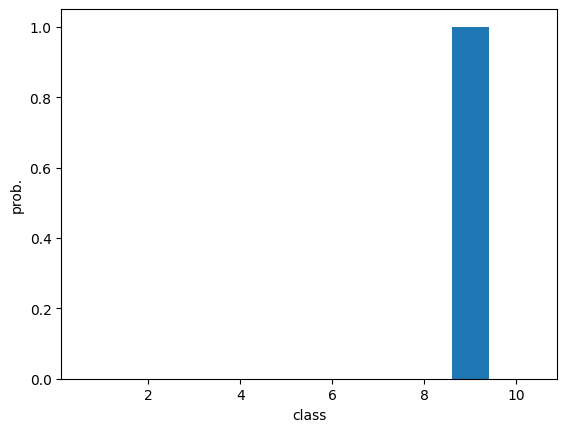

In [17]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [18]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [19]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [20]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [21]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.2394 - accuracy: 0.9141


[0.23940542340278625, 0.9140999913215637]